<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/6_wine_0810-uni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas as pd

In [3]:
red_wine = pd.read_csv('winequality-red.csv')

In [4]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
red_wine.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
corr = red_wine.corr(method='pearson')

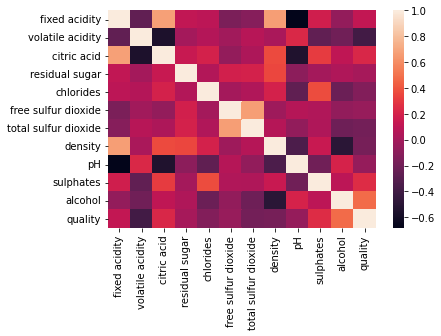

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr = red_wine.corr()
sns.heatmap(corr, xticklabels = corr.columns.values,
           yticklabels=corr.columns.values)

In [8]:
red_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

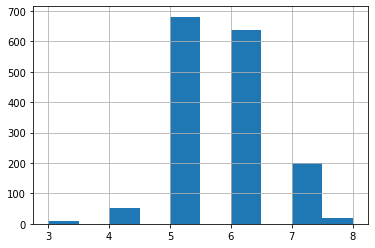

In [9]:
red_wine['quality'].hist()

In [10]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

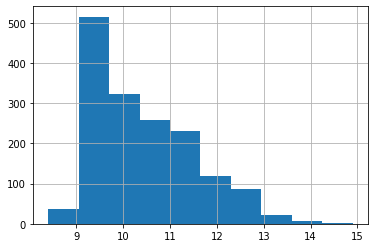

In [12]:
red_wine['alcohol'].hist()

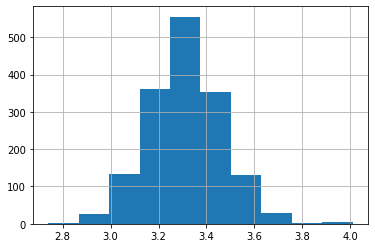

In [13]:
red_wine['pH'].hist()

In [14]:
X = red_wine.iloc[:,0:11]

In [15]:
# y.shape

In [16]:
y = red_wine['quality']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
y_test.shape

(320,)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [22]:
s_X_train = scaler.fit_transform(X_train)

In [23]:
s_X_test = scaler.fit_transform(X_test)

In [24]:
type(s_X_train)

numpy.ndarray

In [25]:
s_X_train.max()

1.0000000000000002

In [26]:
s_X_df = pd.DataFrame(s_X_train)

In [27]:
s_X_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,0.329530,0.281205,0.272471,0.113389,0.127626,0.222031,0.143665,0.492216,0.450118,0.177929,0.310477
std,0.152588,0.122791,0.195448,0.098342,0.082358,0.153933,0.116403,0.136266,0.121272,0.107119,0.161953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.191781,0.100000,0.068493,0.098497,0.089552,0.056537,0.410059,0.370079,0.110429,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.113523,0.194030,0.113074,0.494126,0.448819,0.153374,0.276923
75%,0.407080,0.356164,0.430000,0.116438,0.131886,0.298507,0.201413,0.570852,0.519685,0.220859,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# Scale to [0, 1]
# max_ = df_train.max(axis=0)
# min_ = df_train.min(axis=0)
# df_train = (df_train - min_) / (max_ - min_)
# df_valid = (df_valid - min_) / (max_ - min_)

In [29]:
# df_train.describe()

In [30]:
s_X_train.shape

(1279, 11)

In [31]:
keras_layer = [
    layers.Dense(units=150, input_shape=[11], activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1, activation='linear')
]

In [32]:
# Create a network with 1 linear unit
model = keras.Sequential(keras_layer)

In [33]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1800      
                                                                 
 dense_1 (Dense)             (None, 64)                9664      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,577
Trainable params: 13,577
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(s_X_train, y_train, batch_size=128, epochs=20, validation_data=None)

Epoch 1/20
10/10 [==============================] - 1s 5ms/step - loss: 28.9627 - mse: 28.9627
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 19.9587 - mse: 19.9587
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 7.1095 - mse: 7.1095
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 1.6917 - mse: 1.6917
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 1.3009 - mse: 1.3009
Epoch 6/20
10/10 [==============================] - 0s 7ms/step - loss: 1.0111 - mse: 1.0111
Epoch 7/20
10/10 [==============================] - 0s 13ms/step - loss: 0.8382 - mse: 0.8382
Epoch 8/20
10/10 [==============================] - 0s 10ms/step - loss: 0.7883 - mse: 0.7883
Epoch 9/20
10/10 [==============================] - 0s 8ms/step - loss: 0.7373 - mse: 0.7373
Epoch 10/20
10/10 [==============================] - 0s 8ms/step - loss: 0.7147 - mse: 0.7147
Epoch 11/20
10/10 [==============================] - 0s 11ms/s

In [36]:
history_df = pd.DataFrame(history.history)

In [37]:
history_df.columns

Index(['loss', 'mse'], dtype='object')

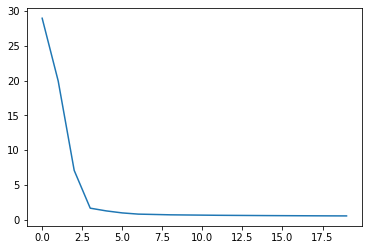

In [38]:
history_df['loss'].plot()

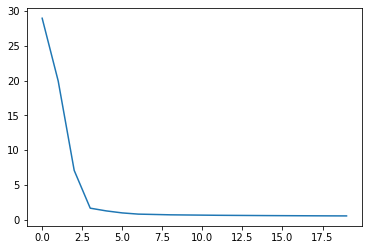

In [39]:
history_df['mse'].plot()